### **Approach.**

**[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image associated with a label from 10 classes. The dataset serves as a direct drop-in replacement for the original [MNIST dataset](http://yann.lecun.com/exdb/mnist/) for benchmarking machine learning algorithms. It shares the same image size and structure for training and testing splits.**


**In this IT3312 - AI Technologies Module's Individual Assignment, I will train a Convolutional Neural Network (CNN) classifier with four convolutional layers using the Keras deep learning library. Additionally, I will use batch normalization to preprocess each layer of the network. Initially, the model will be trained for 10 epochs with a batch size of 256, using the categorical_crossentropy loss function and the Adam optimizer. Afterward, I will apply data augmentation — which generates new training samples by rotating, shifting, and zooming the original samples — and continue training for an additional 50 epochs.**

**To optimize the classifier, I will first split the original training data (60,000 images) into 80% training (48,000 images) and 20% validation (12,000 images). The test data (10,000 images) will be kept separate to evaluate the model's accuracy on previously unseen data. This approach helps me determine whether the model is overfitting the training data. If the validation accuracy is higher than the training accuracy, I might need to lower the learning rate and train for more epochs. Conversely, if the training accuracy surpasses the validation accuracy, it might indicate over-training, prompting me to stop training.**

**Done By: Sandhya Palaniappan.**

In [1]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load training and test data into dataframes
data_train = pd.read_csv('data/fashion-mnist_train.csv')
data_test = pd.read_csv('data/fashion-mnist_test.csv')

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### **Processing Data.**
* **After loading and splitting the data, I preprocess it by reshaping it to the shape expected by the network and scaling the values to be within the [0, 1] range.** 

* **Previously, the training data was stored in an array of shape (60000, 28, 28) of type uint8 with values ranging from [0, 255].**

* **I convert it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.**

In [2]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

### **CNN with 4 Convolutional Layers.**
**This CNN takes input tensors of shape (image_height, image_width, image_channels). In this case, I configure the CNN to process inputs of size (28, 28, 1), which is the format of the FashionMNIST images, by passing the argument input_shape=(28, 28, 1) to the first layer.**

* **The Conv2D layers perform convolution operations to extract features from the input images by sliding a convolution filter over the input to produce a feature map. Here, I choose a feature map size of 3 x 3.**
  
* **The MaxPooling2D layers perform max-pooling operations to reduce the dimensionality of each feature, which helps shorten training time and reduce the number of parameters. I use a pooling window size of 2 x 2.**
  
* **To normalize the input layers, I use BatchNormalization layers to adjust and scale the activations. Batch normalization reduces the covariance shift and allows each layer of the network to learn more independently from other layers.**
  
* **To combat overfitting, I use Dropout layers, a powerful regularization technique. Dropout forces the model to learn multiple independent representations of the same data by randomly disabling neurons during the learning phase. For example, the first dropout layer will randomly disable 25% of the outputs.**
  
* **In total, this model has 4 Conv2D layers, 2 MaxPooling2D layers, 6 BatchNormalization layers, and 5 Dropout layers.**
  
* **The next step is to feed the last output tensor into a stack of Dense layers, also known as fully connected layers. These densely connected classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. Thus, I need to flatten the 3D outputs to 1D, and then add 2 Dense layers on top.**
  
* **Finally, I perform a 10-way classification (as there are 10 classes of fashion images) using a final layer with 10 outputs and a softmax activation. The softmax activation enables the model to calculate the output based on probabilities. Each class is assigned a probability, and the class with the highest probability is the model’s output for the given input.**

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(10, activation='softmax'))

**When compiling the model, I choose categorical_crossentropy as the loss function, which is relevant for multiclass, single-label classification problems, and the Adam optimizer.**

* **Cross-entropy loss measures the error rate between the predicted value and the actual value. The formula for calculating cross-entropy loss is provided [here](https://en.wikipedia.org/wiki/Cross_entropy). categorical_crossentropy is used because there are 10 classes to predict. If there were only 2 classes, I would use binary_crossentropy.**
  
* **The Adam optimizer is an improvement over SGD (Stochastic Gradient Descent). It is responsible for updating the weights of the neurons via backpropagation. It calculates the derivative of the loss function with respect to each weight and adjusts the weights accordingly. This process is how a neural network learns.**

In [4]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

**Let's examine how the dimensions of the feature maps change with each successive layer.**

In [5]:
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
__________

* 1,219,754 parameters are available to be trained.
* The output of the *Conv2D* and *MaxPooling2D* layers are 3D tensors of shape *(height, width, channels)*.
* The number of channels is controlled by the 1st argument passed to the *Conv2D* layer (32).
* The (4, 4, 128) outputs from the 3rd *Dropout* layer are flattened into vectors of shape (2048,) before going through 3 *Dense* layers.

### **Training the Model.**
**As previously mentioned, I train the model with a batch size of 256 for 10 epochs on both the training and validation data.**

In [7]:
history4 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 366s 8ms/step - loss: 0.6095 - acc: 0.7794 - val_loss: 0.3938 - val_acc: 0.8507
Epoch 2/10
48000/48000 [==============================] - 377s 8ms/step - loss: 0.4175 - acc: 0.8507 - val_loss: 0.3296 - val_acc: 0.8808
Epoch 3/10
48000/48000 [==============================] - 366s 8ms/step - loss: 0.3469 - acc: 0.8760 - val_loss: 0.2820 - val_acc: 0.8965
Epoch 4/10
48000/48000 [==============================] - 379s 8ms/step - loss: 0.3147 - acc: 0.8874 - val_loss: 0.2732 - val_acc: 0.9020
Epoch 5/10
48000/48000 [==============================] - 384s 8ms/step - loss: 0.2941 - acc: 0.8946 - val_loss: 0.2740 - val_acc: 0.8986
Epoch 6/10
48000/48000 [==============================] - 381s 8ms/step - loss: 0.2698 - acc: 0.9042 - val_loss: 0.2487 - val_acc: 0.9098
Epoch 7/10
48000/48000 [==============================] - 378s 8ms/step - loss: 0.2613 - acc: 0.9067 - val_loss: 0.2694 - 

In [8]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.26567093777656553
Test accuracy: 0.9052


**My accuracy is 90.52%, which is quite impressive!**

### **Data Augmentation.**
**Overfitting can occur when there are too few samples to learn from, preventing the model from generalizing to new data. With infinite data, the model would be exposed to every possible aspect of the data distribution, and overfitting would not occur.**

**Data augmentation addresses this by generating more training data from existing samples through various random transformations that produce realistic images. The goal is for the model to never see the exact same image twice during training. This exposure helps the model to better understand the data and generalize more effectively.**

**In Keras, data augmentation can be achieved by configuring various random transformations in the ImageDataGenerator instance:**

* **rotation_range: A value in degrees (0–180) within which to randomly rotate images.**
* **width_shift and height_shift: Ranges (as a fraction of total width or height) within which to randomly translate images vertically or horizontally.**
* **shear_range: Applies random shearing transformations.**
* **zoom_range: Performs random zooming into images.**

In [9]:
from keras.preprocessing.image import ImageDataGenerator
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=256)
val_batches = gen.flow(X_val, y_val, batch_size=256)

**Let's train the network with data augmentation.**

In [10]:
history4 = cnn4.fit_generator(batches, steps_per_epoch=48000//256, epochs=50,
                    validation_data=val_batches, validation_steps=12000//256, use_multiprocessing=True)

Epoch 1/50
187/187 [==============================] - 326s 2s/step - loss: 0.4025 - acc: 0.8551 - val_loss: 0.3416 - val_acc: 0.8738
Epoch 2/50
187/187 [==============================] - 318s 2s/step - loss: 0.3599 - acc: 0.8684 - val_loss: 0.3174 - val_acc: 0.8852
Epoch 3/50
187/187 [==============================] - 319s 2s/step - loss: 0.3363 - acc: 0.8777 - val_loss: 0.3179 - val_acc: 0.8828
Epoch 4/50
187/187 [==============================] - 312s 2s/step - loss: 0.3286 - acc: 0.8819 - val_loss: 0.2877 - val_acc: 0.8959
Epoch 5/50
187/187 [==============================] - 318s 2s/step - loss: 0.3190 - acc: 0.8841 - val_loss: 0.3098 - val_acc: 0.8868
Epoch 6/50
187/187 [==============================] - 314s 2s/step - loss: 0.3109 - acc: 0.8870 - val_loss: 0.3295 - val_acc: 0.8761
Epoch 7/50
187/187 [==============================] - 316s 2s/step - loss: 0.3026 - acc: 0.8900 - val_loss: 0.2833 - val_acc: 0.8954
Epoch 8/50
187/187 [==============================] - 315s 2s/step - 

In [11]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.1776888778269291
Test accuracy: 0.9352


**Great news! I have improved the accuracy to 93.52%!**

### **Results.**
**Let's plot the training and validation accuracy, along with the training and validation loss.**

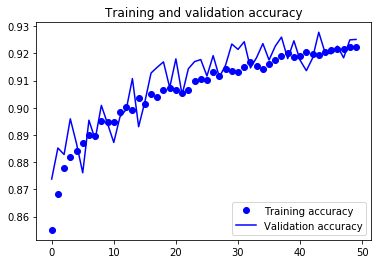

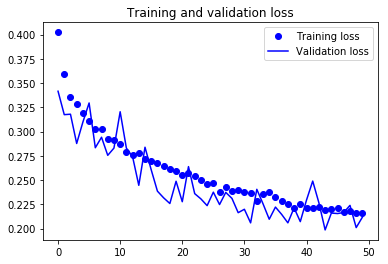

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history4.history['acc']
val_accuracy = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**These plots look good: the training curves closely follow the validation curves.**

### **Classification Report.**
**Here is a summary of my classifier's performance.**

In [14]:
# get the predictions for the test data
predicted_classes = cnn4.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [15]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.91      0.87      0.89      1000
    Class 1       0.99      1.00      1.00      1000
    Class 2       0.95      0.85      0.90      1000
    Class 3       0.94      0.96      0.95      1000
    Class 4       0.86      0.94      0.90      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.78      0.81      0.80      1000
    Class 7       0.95      0.98      0.97      1000
    Class 8       0.99      0.99      0.99      1000
    Class 9       0.99      0.97      0.98      1000

avg / total       0.94      0.94      0.94     10000



**It's clear that the classifier is underperforming for class 6 in both precision and recall.** 

**For class 4, the classifier slightly lacks precision, while for classes 0 and 2, it slightly lacks recall.**

**I might gain more insight by visualizing the correct and incorrect predictions.**

**Here is a subset of correctly predicted classes.**

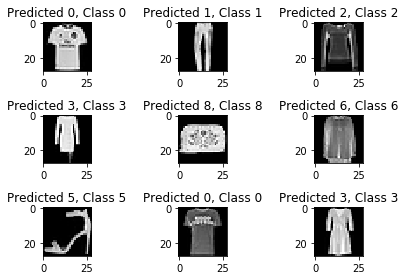

In [16]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

**Here is a subset of the incorrectly predicted classes.**

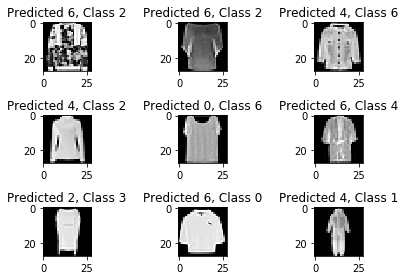

In [17]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()

### **Visualizing What My Model Learns.**

**Deep-learning models are often described as "black boxes" because they learn representations that are difficult to extract and present in a human-readable form. While this is somewhat true for certain types of deep-learning models, it does not apply to convolutional neural networks (convnets). The representations learned by convnets are highly amenable to visualization, primarily because they represent visual concepts.**

**In this context, I attempt to visualize the intermediate outputs of a CNN (intermediate activations). Visualizing intermediate activations involves displaying the feature maps output by various convolutional and pooling layers in the network for a given input. The output of a layer, often called its activation (the result of the activation function), shows how an input is decomposed by the different filters learned by the network.**

**I aim to visualize feature maps with three dimensions: width, height, and depth (channels). Each channel encodes relatively independent features, so the appropriate way to visualize these feature maps is by independently plotting the contents of each channel as a 2D image.**

**I begin by selecting an input test image (#2018).**

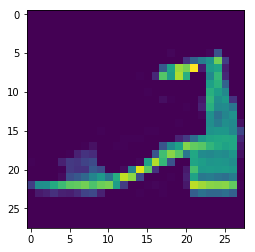

In [18]:
test_im = X_train[2018]
plt.imshow(test_im.reshape(28,28), cmap='viridis', interpolation='none')
plt.show()

**To extract the feature maps I'm interested in, I create a Keras model that takes batches of images as input and outputs the activations of all convolutional and pooling layers. To achieve this, I use the Keras Model class.**

**A model is created using two arguments: an input tensor (or list of input tensors) and an output tensor (or list of output tensors). The resulting instance is a Keras model that maps the specified inputs to the specified outputs. So, when given an image input, this model returns the activation values of the layers in the original model.**

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  


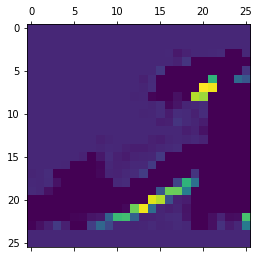

In [20]:
from keras import models
# extracts the outputs of the top 8 layers
layer_outputs = [layer.output for layer in cnn4.layers[:8]]

# creates a model that will return these outputs, given the model input
activation_model = models.Model(input=cnn4.input, output=layer_outputs)

# returns a list of Numpy arrays: one array per layer activation
activations = activation_model.predict(test_im.reshape(1,28,28,1))

# activation of the 1st convolution layer
first_layer_activation = activations[0]

# display the 1st channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')

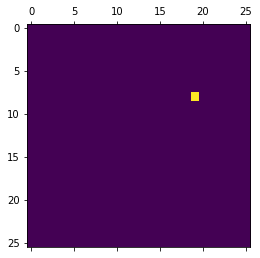

In [21]:
# display the 5th channel of the activation of the 1st layer of the original model
plt.matshow(first_layer_activation[0, :, :, 5], cmap='viridis')

**Let's create a comprehensive visualization of all the activations in the network.** 

**Therefore, I will extract and plot every channel from each of the eight activation maps and then stack the results into one large image tensor, with the channels arranged side by side.**

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


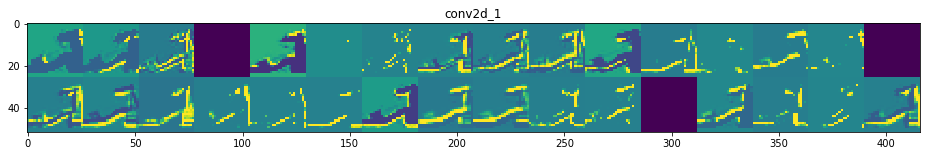

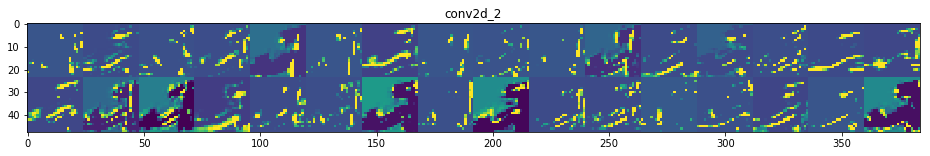

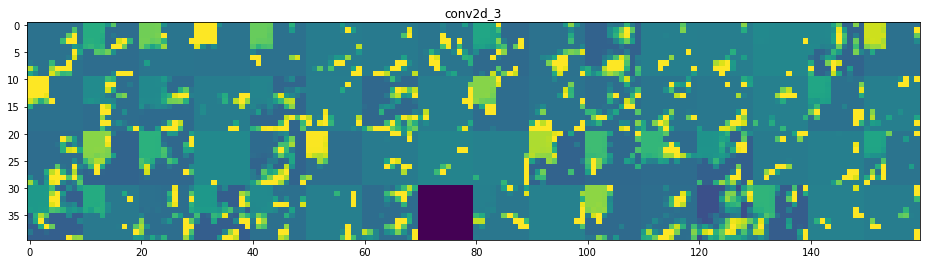

In [22]:
layer_names = []
for layer in cnn4.layers[:-1]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name.startswith('conv'):
        n_features = layer_activation.shape[-1]
        size = layer_activation.shape[1]
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

### **Conclusion.**

**This individual assignment involved training a CNN with four convolutional layers on the Fashion-MNIST dataset. The model achieved a test accuracy of 90.52% after the initial 10 epochs and improved to 93.52% with data augmentation and additional training for 50 epochs. The deeper architecture allowed the model to capture more complex features, which contributed to its higher accuracy.** 

**Future enhancements could involve fine-tuning hyperparameters, adding advanced regularization techniques, and exploring different activation functions. This individual assignment highlighted the benefits of deeper CNN architectures in capturing intricate patterns in image data and improving classification accuracy.**